### Import neccassary packages

In [1]:
import pandas as pd
import numpy as np
from classes.import_data import package_directory, parameters
from classes.import_data import import_pkl_data
from classes.scenario_plots import sc_plot, PlotDropDown, HeatmapDropDown, InteractivePrice, interactiveModelComparison
from classes.model_analysis import validation
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Identify the actual path of this jupyter file

In [2]:
PACKAGEDIR = package_directory()
print(PACKAGEDIR)

c:\Users\honkomp\VisualStudioProjects\analyses_toolbox_gfpmpt


### Import data

In [3]:
import_pkl = import_pkl_data()
data = import_pkl.combined_data()
data_model_intercomparison = {}
data_model_intercomparison['Carbon'] = data['Carbon']
data_model_intercomparison['WorldPrices'] = data['WorldPrices']
data_model_intercomparison['Forest'] = data['Forest']
data_model_intercomparison['Data'] = data['data_periods']

### Plot predefined scenario results 

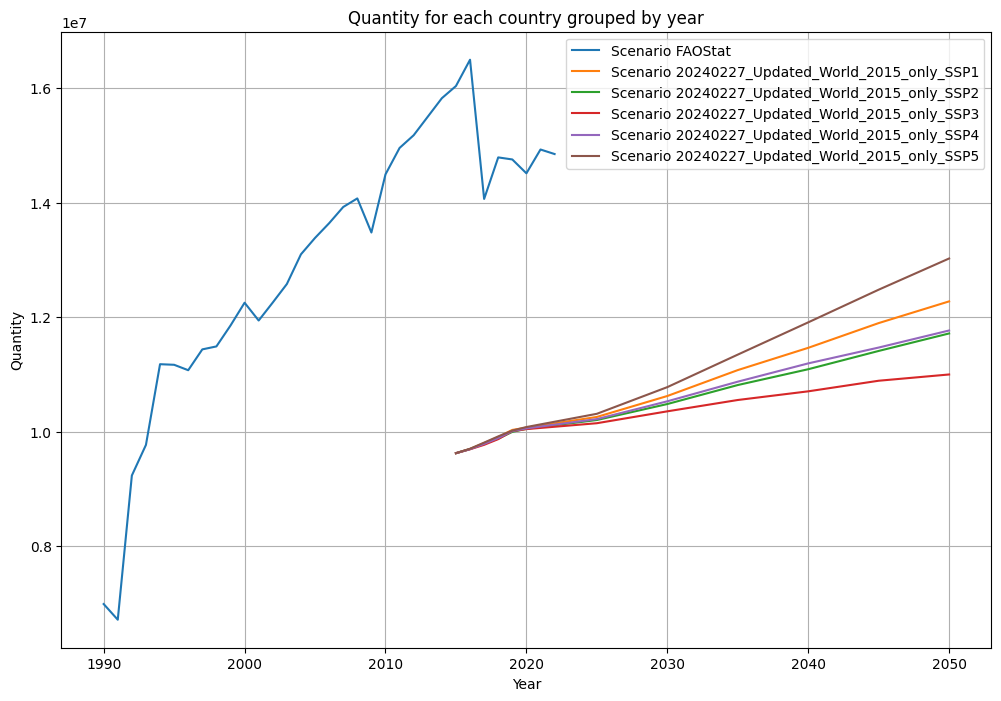

In [4]:
sc_plot = sc_plot()
sc_plot.predefined_plot(data["data_periods"])

### Interactive scenario results (quantities)

In [5]:
data_periods = data["data_periods"]
plot_dropdown_instance = PlotDropDown(data=data_periods,
                                      unique_color=True, 
                                      color='darkblue',
                                      legend=False,
                                      start=1990,
                                      end=2020,
                                      scenario_range=True)

interactive(children=(Dropdown(description='Select RegionCode:', options=('Alle', 'a0', 'a1', 'a2', 'a3', 'a4'…

### Validation tables

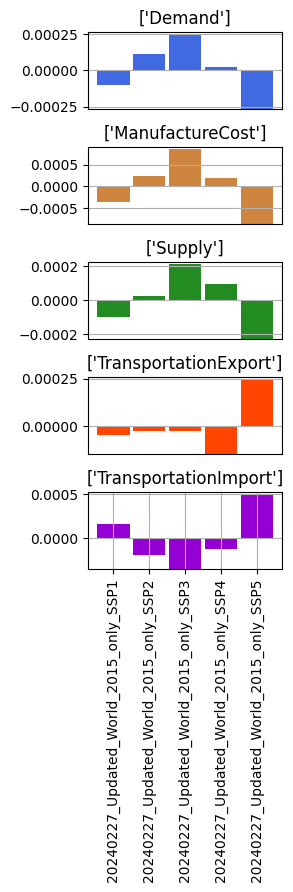

In [6]:
validation = validation()
data_vali = validation.model_difference(data=data["data_periods"])
data_quantities = validation.model_corrcoef(data["data_periods"])

### Interactive scenario results (prices)

In [7]:
#price_interactive = InteractivePrice(data["data_periods"])

### Forest Plots

In [8]:
# import pandas as pd #shift to sc plot
# import matplotlib.pyplot as plt
# import numpy as np

# class ForestData:
#     def __init__(self, data):
#         self.data = data['Forest']

#     def print_forest(self):
#         print(self.data)
    
#     def drop_duplicates(self):
#         self.data = self.data.drop_duplicates().reset_index(drop=True)

#     def plot_stock_area_diagrams(self):
#         unique_scenarios = self.data['Scenario'].unique()
#         all_periods = self.data['Period']

#         plt.figure(figsize=(12, 6))
#         bar_width = 0.15
#         bar_gap = 0.3
#         for i, period in enumerate(all_periods):
#             for j, scenario in enumerate(unique_scenarios):
#                 scenario_data = self.data[(self.data['Scenario'] == scenario) & (self.data['Period'] == period)]
#                 total_stock = scenario_data['ForStock']

#                 # Berücksichtigen Sie nur die vorhandenen Perioden
#                 plt.bar(i * len(unique_scenarios) + j * (bar_width + bar_gap), total_stock.iloc[0], label=f'{scenario} (Period {period})', width=bar_width)

#         plt.xlabel('Scenarios')
#         plt.ylabel('ForStock')
#         plt.xticks(np.arange(len(all_periods) * len(unique_scenarios)) * (bar_width + bar_gap) + bar_width/2, [f'Period {p}' for p in all_periods])
#         plt.legend()
#         plt.title('ForStock for Each Scenario in All Periods')
#         plt.show()

#         plt.figure(figsize=(10, 6))
#         for i, scenario in enumerate(unique_scenarios):
#             scenario_data = self.data[self.data['Scenario'] == scenario]
#             total_area = scenario_data.groupby('Period')['ForArea'].sum()

#             # Berücksichtigen Sie nur die vorhandenen Perioden
#             existing_periods = total_area.index.intersection(all_periods)
#             plt.bar(existing_periods + i * (bar_width + bar_gap), total_area[existing_periods], label=scenario, width=bar_width)


#         plt.xlabel('Period')
#         plt.ylabel('Sum of ForArea')
#         plt.legend()
#         plt.title('ForArea')
#         plt.show()

# if __name__ == "__main__": #shift to sc plot
#     data_container = data
#     forest_instance = ForestData(data_container)
#     forest_instance.print_forest()
#     forest_instance.plot_stock_area_diagrams()

### Worldmap

### Heatmap

In [9]:
#data_selection = data['data_periods']
#heatmap_dropdown_instance = HeatmapDropDown(data=data_selection)

### Validation Model intercomparison

In [10]:
country_data = validation.readin_country_data()
external_model_data = validation.readin_external_data()
data_filtered = validation.filter_data(data=data_model_intercomparison, country_data=country_data)

# reformate external_model_data
external_model_data = validation.reformate_external_data(data=external_model_data)

# align periods of gfpmpt data
period_data = validation.period_structure(data=data_model_intercomparison['Data'])
data_aligned = validation.align_period_data(data=data_filtered, period_data=period_data)

# convert units of gfpmpt 
data_aligned = validation.convert_unit(data=data_aligned)
data_aligned = validation.rename_parameter(data=data_aligned)

# merge data gfpmpt and external model data
data_fin = validation.merge_data(data=data_aligned, external_data=external_model_data)


c:\Users\honkomp\VisualStudioProjects\analyses_toolbox_gfpmpt\classes\model_analysis.py:240: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_period.loc[data_period_index, 'Period'] = data_period.loc[data_period_index, 'year']
c:\Users\honkomp\VisualStudioProjects\analyses_toolbox_gfpmpt\classes\model_analysis.py:240: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_period.loc[data_period_index, 'Period'] = data_period.loc[data_period_index, 'year']
c:\Users\honkomp\VisualStudioProjects\analyses_toolbox

In [18]:
# plot interactive model intercomparison
interactiveModelComparison(data=data_fin, plot_option='min_max')
# available plot options:
# 'min_max': min and max value over all forest sector models are selected and ploted with GFPM data
# 'ssp_fsm_range': For each forest sector model the range over all ssp
# 'ssp_fsm_all': For each forest sector model and each ssp 

Dropdown(description='Select Region:', options=('Alle', 'Africa', 'Asia', 'Europe', 'Former Soviet Union', 'La…

Dropdown(description='Select Model:', options=('Alle', 'GFPMpt', 'GFPM', 'GTM', 'GLOBIOM', 'GFPM '), value='Al…

Dropdown(description='Select Parameter:', options=('Alle', 'Total Forest Non-soil C Stock (MtC)', 'CarbonStock…

Dropdown(description='Select Scenario:', options=('Alle', 'SSP1', 'SSP2', 'SSP3', 'SSP4', 'SSP5'), value='Alle…

Output()

Output()

ValueError: max() arg is an empty sequence

ValueError: max() arg is an empty sequence

ValueError: max() arg is an empty sequence